# Clustering con k-means

Antecedentes del método:
* definir previamente el número de clusters
* definir los varicentros o centroides del modelo

Definimos la distancia intracluste par aun cluster $C_j$ cualquiera como:

$$ SS_W(C_j) = \sum_{x\in C_j}(x-c_j)^2$$

Tambien podemos usar la distancia intracluster normalizada para validar la eficacia del modelo:

$$ SS_W = \sum_{j=1}^k \frac{SS_W(C_j)}{SS_T} ~ ~donde~~ SS_T = \sum_{i=1}^n (x_i-\bar{x})^2$$

## K-means con Python

In [30]:
import numpy as np
from scipy.cluster.vq import vq, kmeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.random.random(90).reshape(30,3)
data

array([[0.61489641, 0.15126503, 0.40827436],
       [0.36205671, 0.92845206, 0.5303241 ],
       [0.17299021, 0.26560242, 0.38556658],
       [0.77189812, 0.01715475, 0.60761888],
       [0.33724771, 0.52420769, 0.66631429],
       [0.38708546, 0.82621501, 0.28175873],
       [0.14860362, 0.76659443, 0.59461127],
       [0.49432777, 0.5909467 , 0.96191414],
       [0.6705283 , 0.07727622, 0.39275884],
       [0.67892033, 0.64773668, 0.9056767 ],
       [0.44786003, 0.50956751, 0.29388278],
       [0.38036486, 0.46481958, 0.59095492],
       [0.80239541, 0.93304809, 0.45143341],
       [0.46522366, 0.47117022, 0.66594814],
       [0.23204929, 0.85651092, 0.36746919],
       [0.33379269, 0.71285465, 0.364461  ],
       [0.25556787, 0.20725635, 0.32453199],
       [0.23864873, 0.14052354, 0.18871524],
       [0.16821879, 0.41669608, 0.11418569],
       [0.99361595, 0.0637767 , 0.64147189],
       [0.80175234, 0.78404718, 0.90310262],
       [0.24178097, 0.55310965, 0.45354752],
       [0.

Definiendo los centroides.

In [4]:
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
clust_center = np.vstack([data[c1], data[c2]])
clust_center

array([[0.14860362, 0.76659443, 0.59461127],
       [0.49432777, 0.5909467 , 0.96191414]])

In [6]:
vq(data, clust_center)

(array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1]),
 array([0.71719856, 0.27548676, 0.54340351, 0.72925142, 0.31540331,
        0.3978755 , 0.        , 0.        , 0.78666495, 0.20115209,
        0.49603917, 0.38051899, 0.68740789, 0.32060775, 0.2581505 ,
        0.3002534 , 0.63027237, 0.75154805, 0.59466154, 0.79364988,
        0.36777229, 0.27231737, 0.24893827, 0.61367746, 0.26132658,
        0.56140614, 0.65649174, 0.80920743, 0.32963009, 0.32667063]))

In [8]:
kmeans(data, clust_center)

(array([[0.29153069, 0.5839984 , 0.41654057],
        [0.71780608, 0.41567237, 0.6445726 ]]),
 0.336998185544524)

#### Dataset de practica

In [11]:
data_red = pd.read_csv('../datasets/wine/winequality-red.csv', sep=';')
data_white = pd.read_csv('../datasets/wine/winequality-white.csv', sep= ';')

In [12]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
data_red.shape

(1599, 12)

Graficando la variable **"quality"**

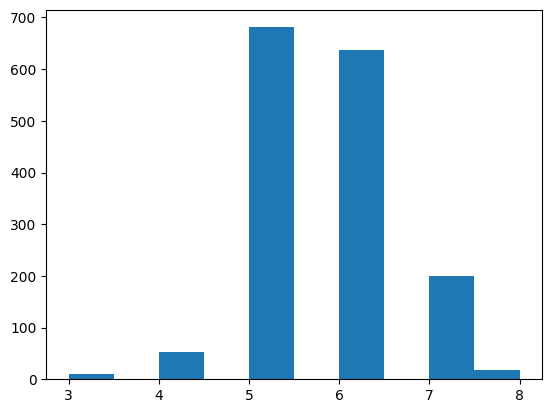

In [16]:
%matplotlib inline
plt.hist(data_red.quality)
plt.show()

In [17]:
data_red.groupby(data_red.quality).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos

In [18]:
data_normalizada = (data_red - data_red.min())/(data_red.max()-data_red.min())
data_normalizada.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerarquico con scikit-learn

In [20]:
clusters = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(data_normalizada)

Text(0, 0.5, 'Número de vinos por cluster')

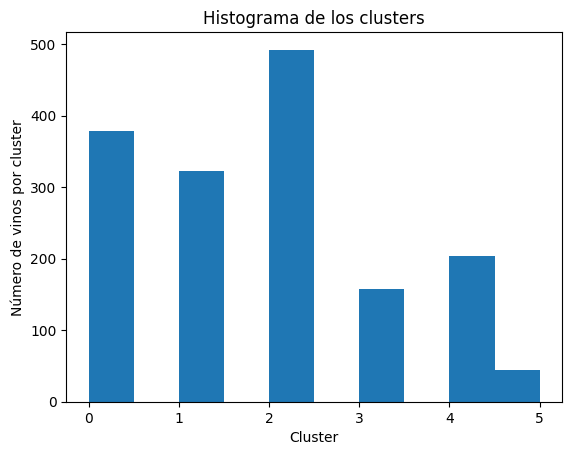

In [34]:
md_h = pd.Series(clusters.labels_)
plt.hist(md_h)
plt.title('Histograma de los clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de vinos por cluster')

In [23]:
clusters.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

Realizamos matriz de distancias, y enlaces, y graficamos el dendrograma.

In [25]:
Z = linkage(data_normalizada, method="ward")

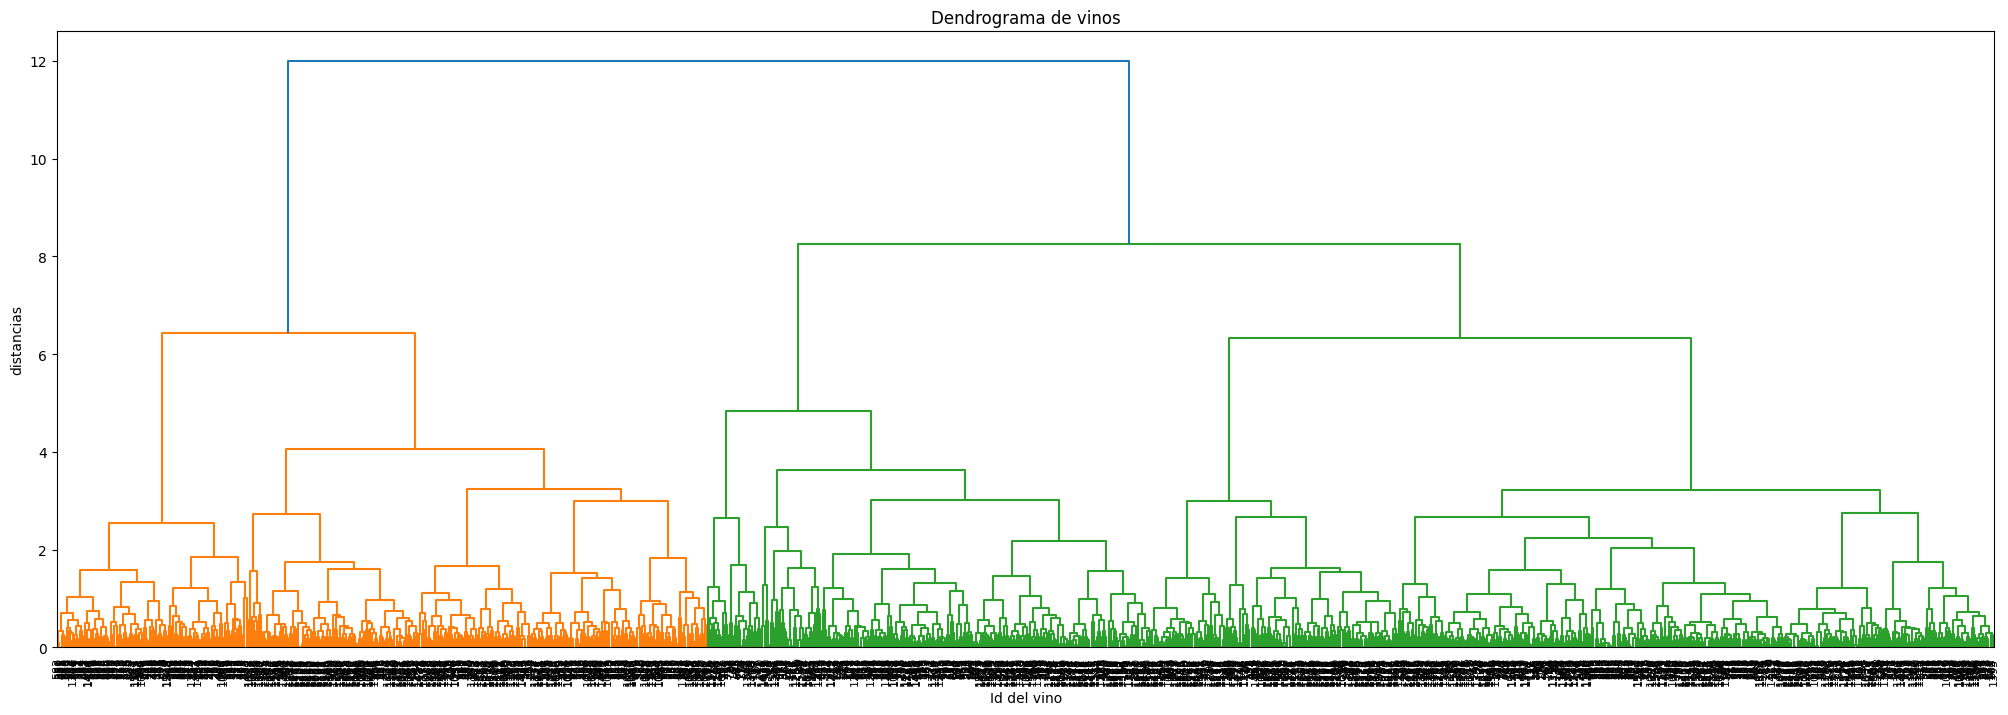

In [27]:
plt.figure(figsize=(25,8))
plt.title('Dendrograma de vinos')
plt.xlabel('Id del vino')
plt.ylabel('distancias')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

## K-means

In [31]:
model = KMeans(n_clusters=6)
model.fit(data_normalizada)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=6)

In [32]:
model.labels_

array([4, 4, 4, ..., 5, 4, 2])

In [33]:
md_k = pd.Series(model.labels_)

In [35]:
data_normalizada['cluster_h'] = md_h
data_normalizada['cluster_k'] = md_k

In [36]:
data_normalizada.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


(array([266.,   0., 297.,   0., 235.,   0., 219.,   0., 366., 216.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

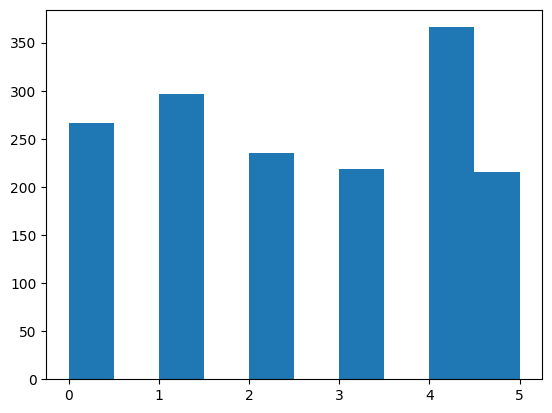

In [37]:
plt.hist(md_k)

## centroide

In [38]:
model.cluster_centers_

array([[0.31871715, 0.2759553 , 0.30890977, 0.16397157, 0.12835302,
        0.41027745, 0.3122559 , 0.54089519, 0.43002191, 0.19206699,
        0.22057066, 0.4556391 ],
       [0.33583624, 0.28204419, 0.27973064, 0.09236198, 0.13634396,
        0.1398492 , 0.13328812, 0.52492621, 0.41353164, 0.18431823,
        0.20901321, 0.47474747],
       [0.36998682, 0.15542116, 0.4326383 , 0.10652871, 0.10547366,
        0.16553791, 0.08393354, 0.40576124, 0.41236388, 0.24008154,
        0.50271686, 0.71404255],
       [0.59324363, 0.20311816, 0.54981735, 0.13238882, 0.17005511,
        0.14566853, 0.09672943, 0.65769852, 0.31657858, 0.25171575,
        0.29692074, 0.55525114],
       [0.23782581, 0.38214874, 0.06871585, 0.09335467, 0.12069752,
        0.16399215, 0.10460716, 0.47986527, 0.52179338, 0.15392166,
        0.23530195, 0.43169399],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311,

Eficiencia del modelo

In [40]:
model.inertia_

188.54982797839435

### Interpretación final

In [41]:
data_normalizada.groupby('cluster_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.318717,0.275955,0.308910,0.163972,0.128353,0.410277,0.312256,0.540895,0.430022,0.192067,0.220571,0.455639,1.056391
1,0.335836,0.282044,0.279731,0.092362,0.136344,0.139849,0.133288,0.524926,0.413532,0.184318,0.209013,0.474747,1.535354
2,0.369987,0.155421,0.432638,0.106529,0.105474,0.165538,0.083934,0.405761,0.412364,0.240082,0.502717,0.714043,0.080851
3,0.593244,0.203118,0.549817,0.132389,0.170055,0.145669,0.096729,0.657699,0.316579,0.251716,0.296921,0.555251,2.479452
4,0.237826,0.382149,0.068716,0.093355,0.120698,0.163992,0.104607,0.479865,0.521793,0.153922,0.235302,0.431694,2.131148
5,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037


### Método del codo

Si representamos el número de clusters vs $SS_w(k)$ la función suele presentar un codoque marca el k óptimo par ael método k-means.